$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [41]:
import numpy as np

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    psi_new = np.array(psi)  # Wave function at next step
    # psi_old = np.zeros(N+1)  # Wave function at previous step
    psi = np.array(psi)  # Ensure psi is not modified outside
    psi_old = np.array(psi)  # Wave function at previous step

    # Set initial condition is assumed to be done outside this function

    # # First time step (could be refined for specific initial velocity conditions)
    # for i in range(1, N):
    #     psi_new[i] = psi[i] + 0.5 * (c**2 * (dt**2 / dx**2)) * (psi[i+1] + psi[i-1] - 2 * psi[i])
    # psi_old = psi  # Prepare for next step
    # psi = psi_new

    psi_list = []

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(0, time_steps):
        # psi_old = psi
        # print(f"before: {psi[20]}")
        for i in range(1, N):
            psi_new[i] = (c**2 * (dt**2 / dx**2)) * (psi[i+1] + psi[i-1]- 2 * psi[i]) - psi_old[i] + 2 * psi[i]

        # print(f"after: {psi[20]}")

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends
        psi_old = np.array(psi)
        psi = np.array(psi_new)

        psi_list.append(psi)

    return psi, psi_list



In [42]:
# Simulation parameters
L = 1.0     # Length of the string
N = 1000    # Number of intervals (N+1 points)
c = 1.0     # Wave speed
dt = 0.001  # Time step
T = 0.4     # Total time of simulation

In [43]:
def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_34684\3093737194.py:13: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(xs, psi_new[i], label=f'State at ($\Psi(x, {np.round(i*dt, 2)})$)', alpha=0.1*gradient)
C:\Users\sacha\AppData\Local\Temp\ipykernel_34684\3093737194.py:16: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('Wave function ($\Psi$)')


400


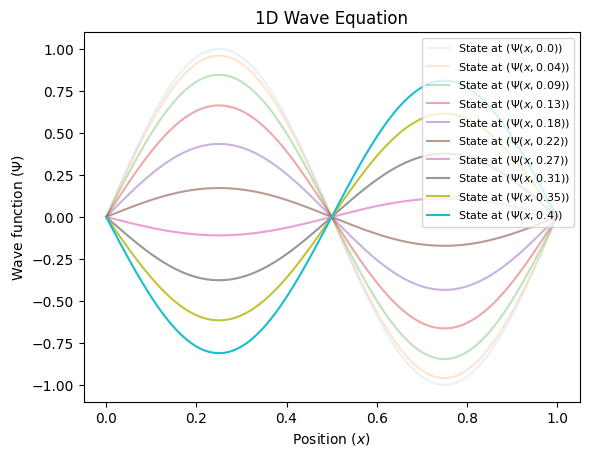

400


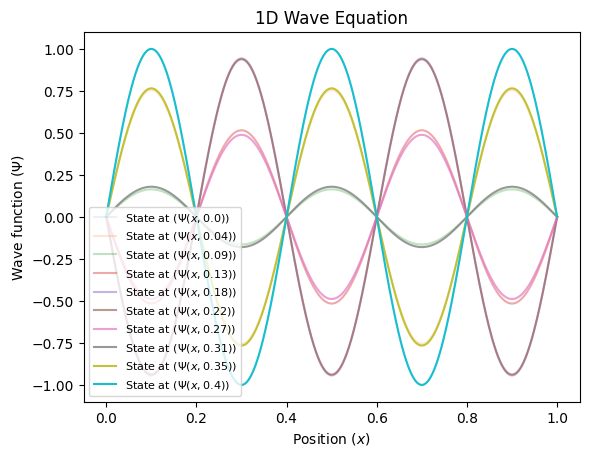

400


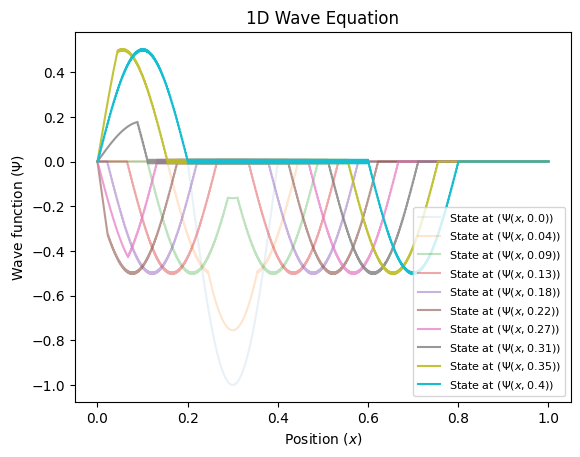

In [44]:
xs = np.linspace(0, L, N+1)  # Position array
psis = timestepping(xs)

for psi in psis:
    # for T in np.arange(0, 6001, 1000):
    _, psi_new = vibrating_string(L, N, c, dt, T, psi)

    # Plot the final state
    print(len(psi_new))
    gradient = 1
    for i in np.linspace(0, len(psi_new)-1, 10, dtype = int):
        
        plt.plot(xs, psi_new[i], label=f'State at ($\Psi(x, {np.round(i*dt, 2)})$)', alpha=0.1*gradient)
        gradient += 1
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_34684\1245938215.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
C:\Users\sacha\AppData\Local\Temp\ipykernel_34684\1245938215.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
C:\Users\sacha\AppData\Local\Temp\ipykernel_34684\1245938215.py:8: SyntaxWarning: invalid escape sequence '\P'
  line, = ax.plot(xs, psi, labe

KeyboardInterrupt: 

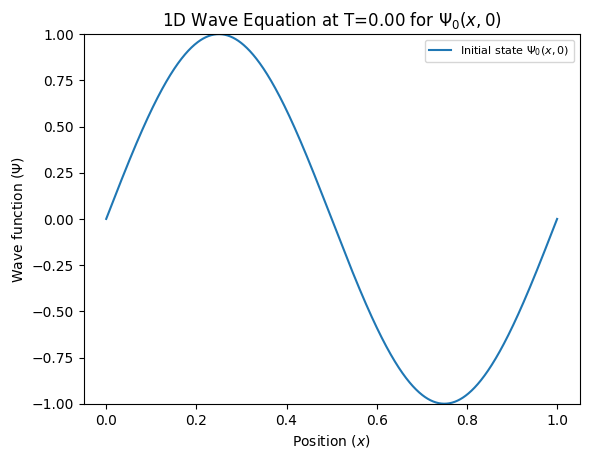

In [45]:
# Prepare individual figure for each psi
for idx, psi in enumerate(psis):
    fig, ax = plt.subplots()
    ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title=f'1D Wave Equation for $\Psi_{idx}(x, 0)$')
    ax.set_ylim(-1, 1)
    
    # Initial line for this psi
    line, = ax.plot(xs, psi, label=f'Initial state $\Psi_{idx}(x, 0)$')
    ax.legend(fontsize=8)
    
    # Animation function for this psi
    def animate(T, idx=idx, line=line):  # Capture current 'idx' and 'line' in the closure
        psi_new, _ = vibrating_string(L, N, c, dt, T, psi)
        line.set_ydata(psi_new)
        ax.set_title(f'1D Wave Equation at T={T:.2f} for $\Psi_{idx}(x, 0)$')
    
    # Create animation for this psi
    ani = FuncAnimation(fig, animate, frames=np.arange(0, 1, 0.01), interval=5)
    ani.save(f'animation_i_{idx}.gif', writer=PillowWriter(fps=10))

    plt.close(fig)  # Close the figure to prevent it from displaying inline


# 1.2


# D


Top: $c(x, y=1, t) = H(t)$\
Left: $c(x=0, y, t) = c(x=1, y, t)$\
Right: $c(x=1, y, t) =c(x=0, y, t)$\
Bottom: $c(x, y=0, t) = 0$


In [2]:
def simulate_diffusion(grid_size, D, dt, t, steps):
    dx = 1 / grid_size
    
    # Stability condition check (for explicit scheme)
    assert (4 * D * dt) / (dx**2) <= 1, "The simulation might be unstable, adjust parameters."

    # Initialize grid
    u = np.zeros((grid_size, grid_size))

    # Set top row concentration to 1
    u[0, :] = 1

    # Diffusion simulation only along y-axis
    for step in range(steps):
        current_time = step * dt
        for i in range(1, grid_size-1):
            u[i, :] = u[i, :] + D * dt / dx**2 * (u[i+1, :] + u[i-1, :]  - 2 * u[i, :])

        # Boundary condition
        u[:, -1] = u[:, 0]

        if current_time == t:
            return u
        
    return u

# E

In [3]:
# Parameters
grid_size = 50
D = 1  # Diffusion coefficient, arbitrary units
dt = 0.0001  # Time step, arbitrary units
steps = 10000 # Number of time steps to simulate


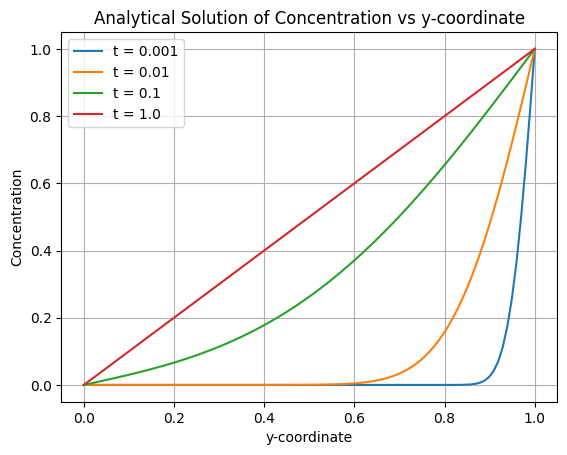

In [4]:
from scipy.special import erfc

def analytical_solution(y, t, D, terms=100):
    concentration = 0
    for i in range(terms):
        term = erfc((1 - y + 2*i) / (2 * np.sqrt(D * t))) - erfc((1 + y + 2*i) / (2 * np.sqrt(D * t)))
        concentration += term
    return concentration

# Parameters
D = 1.0  # Diffusion coefficient
y_values = np.linspace(0, 1, 100)  # Spatial coordinates
times = [0.001, 0.01, 0.1, 1.0]  # Times to evaluate the concentration

# Calculate and plot the analytical solution for each time
for t in times:
    concentration_values = [analytical_solution(y, t, D) for y in y_values]
    plt.plot(y_values, concentration_values, label=f"t = {t}")

plt.xlabel('y-coordinate')
plt.ylabel('Concentration')
plt.title('Analytical Solution of Concentration vs y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

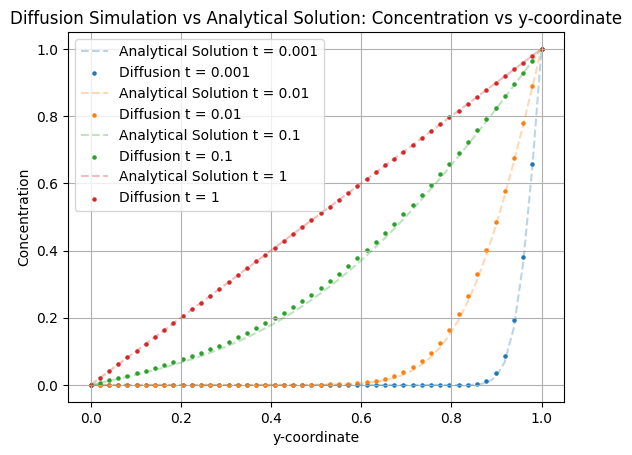

In [79]:
# Parameters
D = 1.0  # Diffusion coefficient
grid_size = 50
steps = 100000 # Number of time steps to simulate
dt = 0.00001  # Time step, arbitrary units
times = [0.001, 0.01, 0.1, 1]  # Times to evaluate the concentration

# Calculate and plot the analytical solution for each time
for t in times:
    u = simulate_diffusion(grid_size, D, dt, t, steps)[::-1][:, 0]
    y_values = np.linspace(0, 1, len(u))
    concentration_values = [analytical_solution(y, t, D) for y in y_values]
    plt.plot(y_values, concentration_values, label=f"Analytical Solution t = {t}", linestyle='--', alpha = 0.3)
    plt.scatter(y_values, u, s=5, label=f"Diffusion t = {t}")


plt.xlabel('y-coordinate')
plt.ylabel('Concentration')
plt.title('Diffusion Simulation vs Analytical Solution: Concentration vs y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

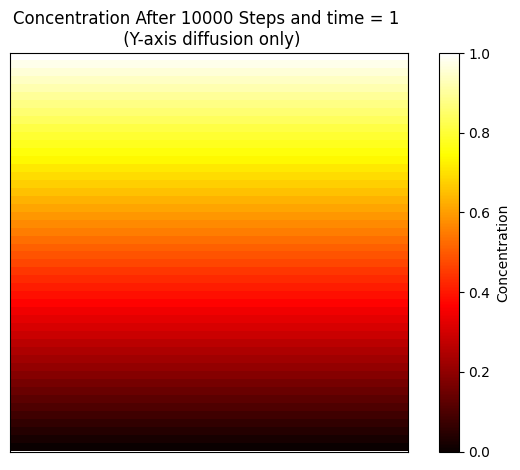

In [5]:
# Parameters
grid_size = 50
D = 1  # Diffusion coefficient, arbitrary units
dt = 0.0001  # Time step, arbitrary units
steps = 10000 # Number of time steps to simulate
t = 1

u = simulate_diffusion(grid_size, D, dt, t, steps)
plt.imshow(u, cmap='hot', interpolation='nearest')
plt.xlabel(f"t = {np.round(dt)}")
plt.colorbar(label='Concentration')

#hide axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title(f'Concentration After {steps} Steps and time = {1} \n (Y-axis diffusion only)')
plt.tight_layout()
plt.show()

C:\Users\koenw\AppData\Local\Temp\ipykernel_22400\778713490.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


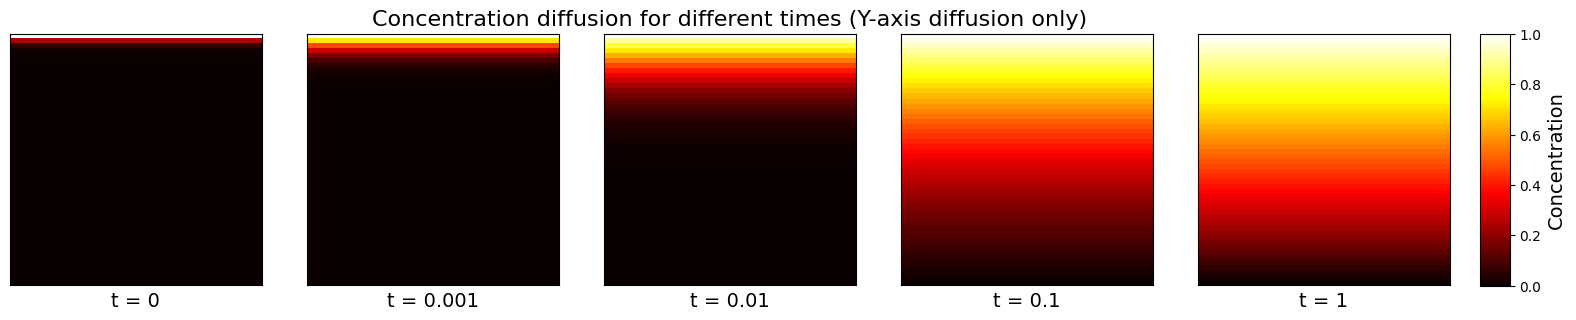

In [81]:
t_list = [0, 0.001, 0.01, 0.1, 1]

# Plotting
fig, axes = plt.subplots(1, len(t_list), figsize=(15, 3))

for i, t in enumerate(t_list):
    ax = axes[i]
    u = simulate_diffusion(grid_size, D, dt, t, steps)
    im = ax.imshow(u, cmap='hot', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"t = {t}", fontsize=14)
    # ax.set_ylabel(f"t = {np.round(dt)}")

# Add colorbar
cbar_ax = fig.add_axes([1, 0.08, 0.02, 0.84])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Concentration', fontsize=14)

# Set title for the last subplot
axes[2].set_title(f'Concentration diffusion for different times (Y-axis diffusion only)', fontsize=16, loc='center')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

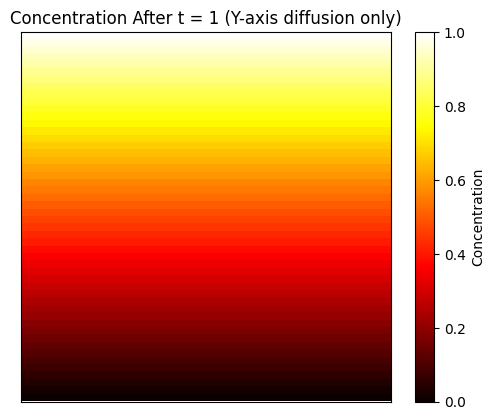

In [82]:
# Parameters
grid_size = 50
D = 1  # Diffusion coefficient, arbitrary units
dt = 0.0001  # Time step, arbitrary units
steps = 10000 # Number of time steps to simulate
t = 1

# Create initial concentration matrix
initial_concentration = np.zeros((grid_size, grid_size))
initial_concentration[:, 0] = 1  # Set initial concentration at one end

# Function to update animation frames
def update(frame):
    u = simulate_diffusion(grid_size, D, dt, t, frame)
    im.set_array(u)
    return im,

# Create figure and axis
fig, ax = plt.subplots()
im = ax.imshow(initial_concentration, cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar(im, label='Concentration')

# Hide axis
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Set title
plt.title(f'Concentration After t = 1 (Y-axis diffusion only)')

# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, steps, 100), interval=10, blit=True)
ani.save(f'animation_diff.gif', writer=PillowWriter(fps=100))

plt.close(fig)  # Close the figure to prevent it from displaying inline

# 1.6
# H

## Jacobi Iteration

In [6]:
def simulate_diffusion_jacobi(grid_size, epsilon):
    # Initialize grid for Jacobi Iteration
    u_jacobi = np.zeros((grid_size, grid_size))
    u_jacobi[0, :] = 1  # Set top row concentration to 1

    # Temporary grid for storing old values during iteration
    temp_grid = np.copy(u_jacobi)

    theta = np.inf  # Initialize theta
    iteration = 0  # Counter for iterations
    theta_list = []

    # Perform Jacobi Iteration until convergence
    while theta > epsilon:
        temp_grid = np.copy(u_jacobi)  # Copy current state to temporary grid
        for i in range(1, grid_size-1):
            # Jacobi update using only vertical neighbors
            u_jacobi[i, :] = 0.5 * (temp_grid[i+1, :] + temp_grid[i-1, :])

        # Boundary condition
        u_jacobi[:, -1] = u_jacobi[:, 0]

        # Calculate the maximum change (theta) across the grid
        theta = np.max(np.abs(u_jacobi - temp_grid))
        theta_list.append(theta)
        iteration += 1

    return u_jacobi, iteration, theta_list

In [7]:
# Parameters
grid_size = 50
epsilon = 1e-5

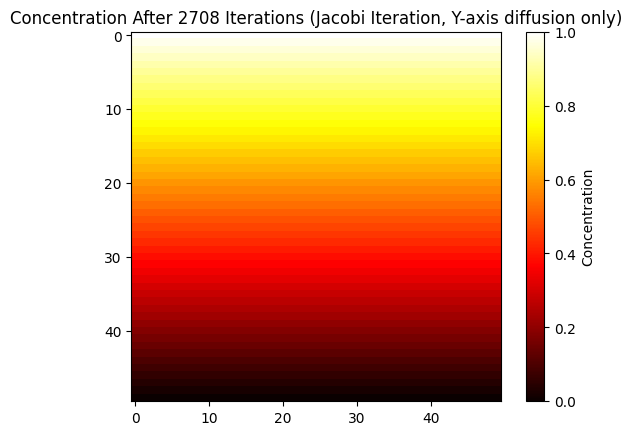

In [8]:
u_jacobi, iteration, _ = simulate_diffusion_jacobi(grid_size, epsilon)

# Plot final state for Jacobi Iteration
plt.imshow(u_jacobi, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (Jacobi Iteration, Y-axis diffusion only)')
plt.show()

# Gauss-Seidel Iteration

In [10]:
def simulate_diffusion_gauss_seidel(grid_size, epsilon):
    # Initialize grid for Gauss-Seidel Iteration
    u_gs = np.zeros((grid_size, grid_size))
    u_gs[0, :] = 1  # Set top row concentration to 1

    theta = np.inf  # Initialize theta to be larger than epsilon
    iteration = 0  # Counter for iterations
    theta_list = []

    # Perform Gauss-Seidel Iteration until convergence
    while theta > epsilon:
        max_change = 0
        for i in range(1, grid_size-1):
            for j in range(grid_size):
                old_value = u_gs[i, j]  # Store the old value of the current cell
                # Gauss-Seidel update using only vertical neighbors
                u_gs[i, j] = 0.5 * (u_gs[i+1, j] + u_gs[i-1, j])
                # Calculate the maximum change for convergence check
                max_change = max(max_change, np.abs(u_gs[i, j] - old_value))

        # Boundary condition
        u_gs[:, -1] = u_gs[:, 0]
        
        theta = max_change
        theta_list.append(theta)
        iteration += 1

    return u_gs, iteration, theta_list

In [11]:
# Parameters
grid_size = 50
epsilon = 1e-5

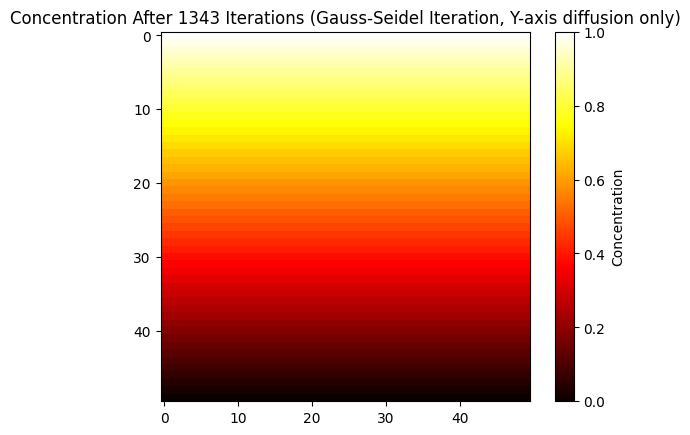

In [12]:
u_gs, iteration, _ = simulate_diffusion_gauss_seidel(grid_size, epsilon)

# Plot final state for Gauss-Seidel Iteration
plt.imshow(u_gs, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (Gauss-Seidel Iteration, Y-axis diffusion only)')
plt.show()

# Successive Over Relaxation

In [13]:
def simulate_diffusion_sor(grid_size, epsilon, omega):
    # Initialize the concentration grid for Successive Over Relaxation (SOR)
    u_sor = np.zeros((grid_size, grid_size))
    u_sor[0, :] = 1  # Set top row concentration to 1

    theta = np.inf  # Initialize theta to be larger than epsilon
    iteration = 0  # Counter for iterations
    theta_list = []

    # Perform SOR until convergence, in place
    while theta > epsilon:
        max_change = 0
        for i in range(1, grid_size-1):
            for j in range(grid_size):
                old_value = np.copy(u_sor[i, j])  # Store the old value of the current cell
                # SOR update using only the vertical neighbors
                u_sor[i, j] = (omega / 2) * (u_sor[i+1, j] + u_sor[i-1, j]) + (1 - omega) * old_value
                # Calculate the maximum change for convergence check
                max_change = max(max_change, np.abs(u_sor[i, j] - old_value))

        # Boundary condition
        u_sor[:, -1] = u_sor[:, 0]

        theta = max_change
        theta_list.append(theta)
        iteration += 1

    return u_sor, iteration, theta_list


In [14]:
# Parameters
grid_size = 50
epsilon = 1e-5
omega = 1.7

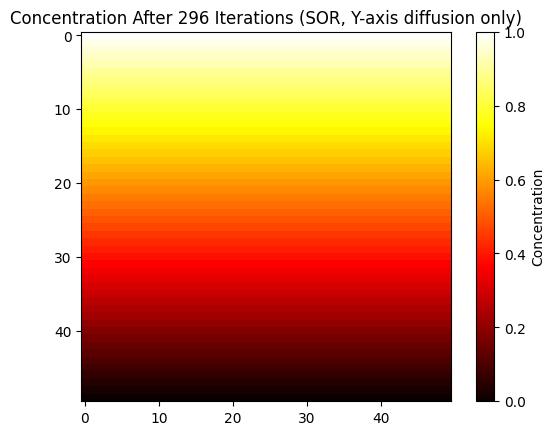

In [15]:
u_sor, iteration, _ = simulate_diffusion_sor(grid_size, epsilon, omega)

# Plot final state for SOR
plt.imshow(u_sor, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentration')
plt.title(f'Concentration After {iteration} Iterations (SOR, Y-axis diffusion only)')
plt.show()

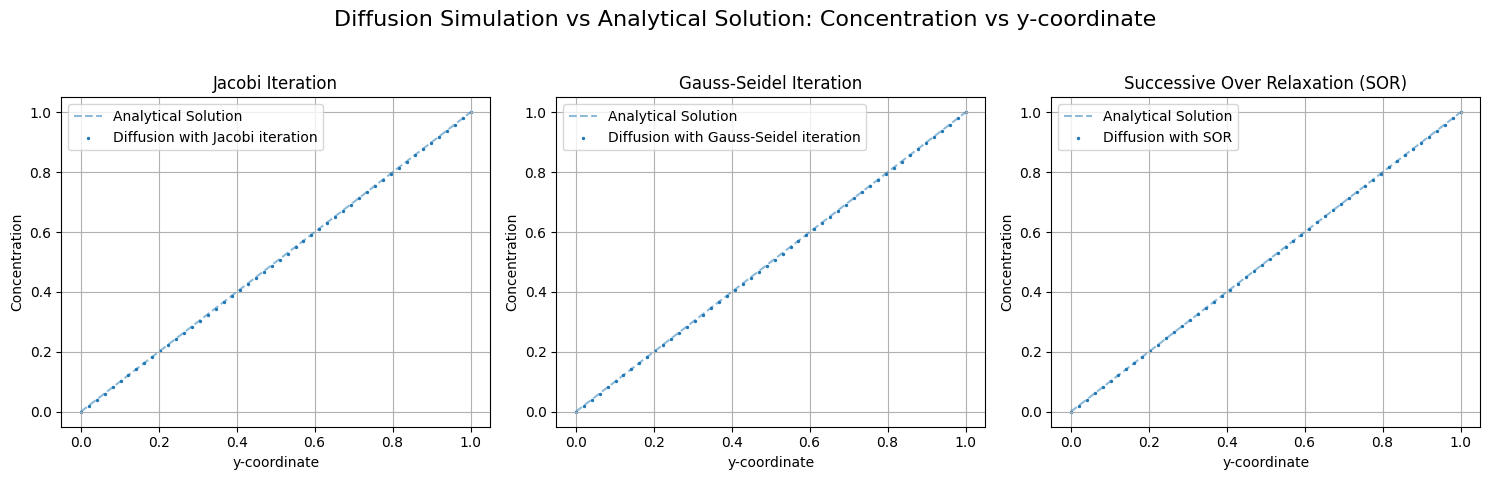

In [16]:
# Parameters
D = 1.0  # Diffusion coefficient
grid_size = 50
steps = 10000  # Number of time steps to simulate
dt = 0.0001  # Time step, arbitrary units
t = 1  # Times to evaluate the concentration

# Calculate and plot the analytical solution for each time
u_jacobi, iteration_jacobi, theta_jacobi = simulate_diffusion_jacobi(grid_size, epsilon)
u_gs, iteration_gs, theta_gs = simulate_diffusion_gauss_seidel(grid_size, epsilon)
u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)

y_jacobi = np.linspace(0, 1, len(u_jacobi))
concentration_jacobi = [analytical_solution(y, t, D) for y in y_jacobi]
y_gs = np.linspace(0, 1, len(u_gs))
concentration_gs = [analytical_solution(y, t, D) for y in y_gs]
y_sor = np.linspace(0, 1, len(u_sor))
concentration_sor = [analytical_solution(y, t, D) for y in y_sor]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot results for Jacobi iteration
ax1.plot(y_jacobi, concentration_jacobi, label=f"Analytical Solution", linestyle='--', alpha=0.5)
ax1.scatter(y_jacobi, u_jacobi[::-1][:, 0], s=2, label=f"Diffusion with Jacobi iteration")
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('y-coordinate')
ax1.set_ylabel('Concentration')
ax1.set_title('Jacobi Iteration')

# Plot results for Gauss-Seidel iteration
ax2.plot(y_gs, concentration_gs, label=f"Analytical Solution", linestyle='--', alpha=0.5)
ax2.scatter(y_gs, u_gs[::-1][:, 0], s=2, label=f"Diffusion with Gauss-Seidel iteration")
ax2.legend()
ax2.grid(True)
ax2.set_xlabel('y-coordinate')
ax2.set_ylabel('Concentration')
ax2.set_title('Gauss-Seidel Iteration')

# Plot results for Successive overrelaxation (SOR)
ax3.plot(y_sor, concentration_sor, label=f"Analytical Solution", linestyle='--', alpha=0.5)
ax3.scatter(y_sor, u_sor[::-1][:, 0], s=2, label=f"Diffusion with SOR")
ax3.legend()
ax3.grid(True)
ax3.set_xlabel('y-coordinate')
ax3.set_ylabel('Concentration')
ax3.set_title('Successive Over Relaxation (SOR)')

# Adjust layout
plt.suptitle('Diffusion Simulation vs Analytical Solution: Concentration vs y-coordinate', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

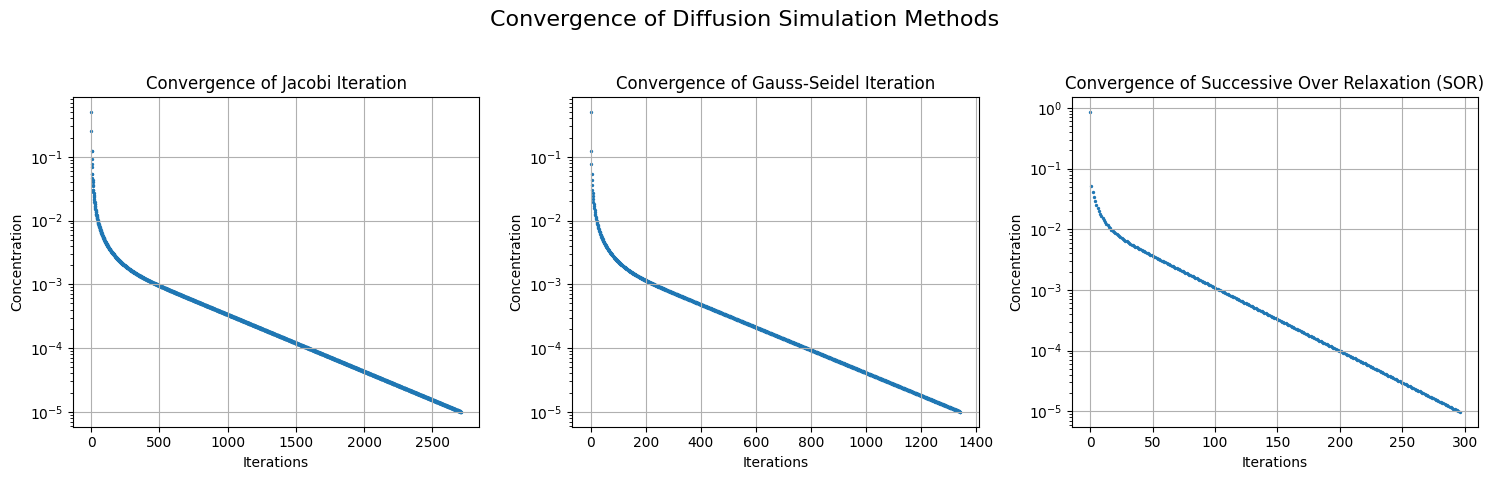

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Calculate and plot the analytical solution for each time
jac_it = np.linspace(0, iteration_jacobi, len(theta_jacobi))
gs_it = np.linspace(0, iteration_gs, len(theta_gs))
sor_it = np.linspace(0, iteration_sor, len(theta_sor))

ax1.scatter(jac_it, theta_jacobi, s=2, label=f"Diffusion t = {t}")
# ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Concentration')
ax1.set_title('Convergence of Jacobi Iteration')
ax1.set_yscale('log')

ax2.scatter(gs_it, theta_gs, s=2, label=f"Diffusion t = {t}")
# ax2.legend()
ax2.grid(True)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Concentration')
ax2.set_title('Convergence of Gauss-Seidel Iteration')
ax2.set_yscale('log')

ax3.scatter(sor_it, theta_sor, s=2, label=f"Diffusion t = {t}")
# ax3.legend()
ax3.grid(True)
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Concentration')
ax3.set_title('Convergence of Successive Over Relaxation (SOR)')
ax3.set_yscale('log')

plt.suptitle('Convergence of Diffusion Simulation Methods', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


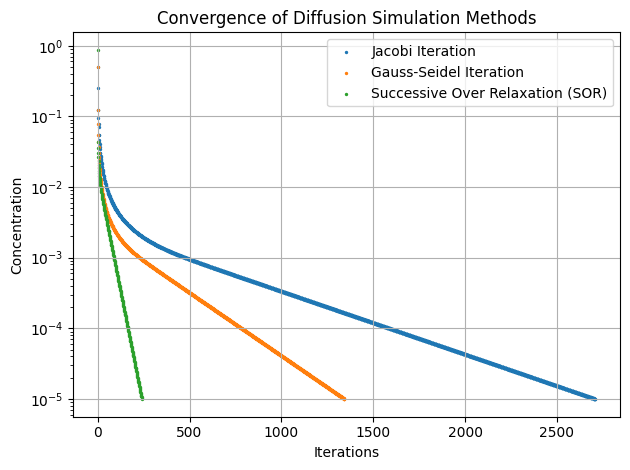

In [21]:
# Calculate and plot the analytical solution for each time
jac_it = np.linspace(0, iteration_jacobi, len(theta_jacobi))
gs_it = np.linspace(0, iteration_gs, len(theta_gs))
sor_it = np.linspace(0, iteration_sor, len(theta_sor))

# Scatter plots for each method
plt.scatter(jac_it, theta_jacobi, s=2, label='Jacobi Iteration')
plt.scatter(gs_it, theta_gs, s=2, label='Gauss-Seidel Iteration')
plt.scatter(sor_it, theta_sor, s=2, label='Successive Over Relaxation (SOR)')

plt.legend()
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Concentration')
plt.title('Convergence of Diffusion Simulation Methods')
plt.yscale('log')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

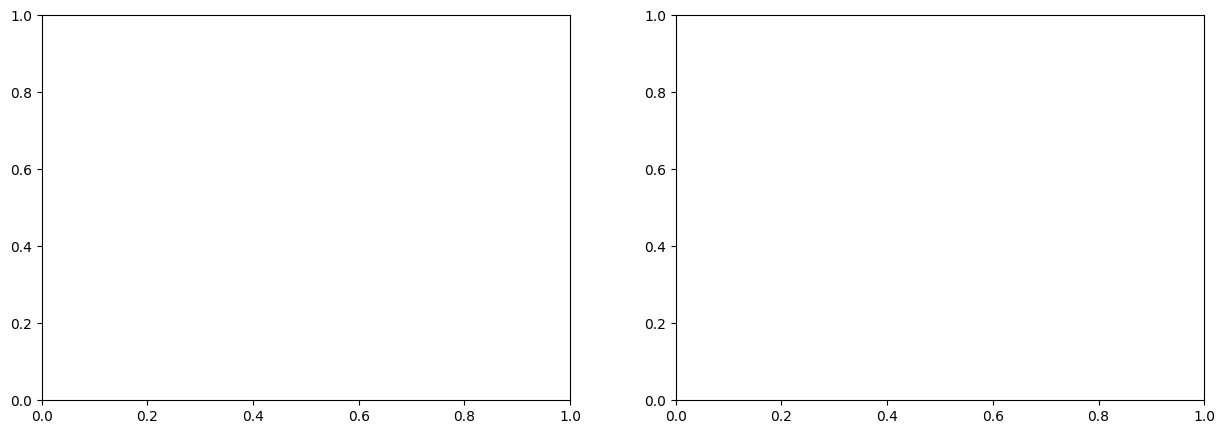

In [19]:
# Parameters
D = 1.0  # Diffusion coefficient
grid_size = 50
steps = 10000  # Number of time steps to simulate
dt = 0.0001  # Time step, arbitrary units
t = 1  # Times to evaluate the concentration

# Parameters
grid_size = 50
epsilon = 1e-5
omega = 1.5 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for omega in np.arange(0.1, 2, 0.3):
    u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
    sor_it = np.linspace(0, iteration_sor, len(theta_sor))

    ax1.scatter(sor_it, theta_sor, s=1, label=f"Omega = {np.round(omega, 2)}")
    print(omega)

ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Concentration')
ax1.set_title('Convergence of Successive Over Relaxation (SOR)')
ax1.set_yscale('log')

for omega in np.arange(1.7, 2, 0.1):
    u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
    sor_it = np.linspace(0, iteration_sor, len(theta_sor))

    ax2.scatter(sor_it, theta_sor, s=1, label=f"Omega = {np.round(omega, 2)}")
    print(omega)

ax2.legend()
ax2.grid(True)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Concentration')
ax2.set_title('Convergence of Successive Over Relaxation (SOR)')
ax2.set_yscale('log')

plt.suptitle('Convergence of Diffusion Simulation Methods', fontsize=16)
plt.tight_layout()
plt.show()


1.75
1.8
1.85
1.9000000000000001
1.9500000000000002


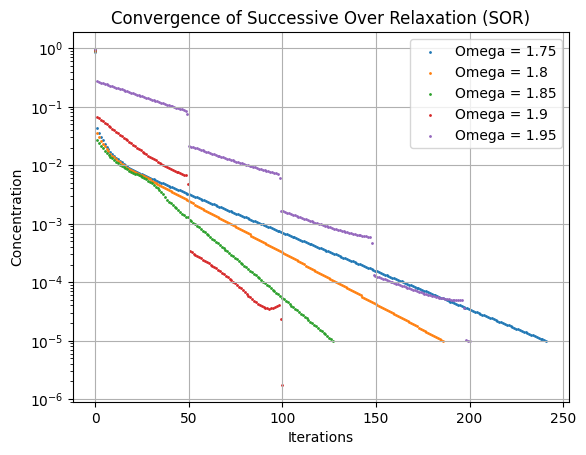

In [22]:
# Parameters
D = 1.0  # Diffusion coefficient
grid_size = 50
steps = 10000  # Number of time steps to simulate
dt = 0.0001  # Time step, arbitrary units
t = 1  # Times to evaluate the concentration

# Parameters
grid_size = 50
epsilon = 1e-5

for omega in np.arange(1.75, 1.99, 0.05):
    u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
    sor_it = np.linspace(0, iteration_sor, len(theta_sor))

    plt.scatter(sor_it, theta_sor, s=1, label=f"Omega = {np.round(omega, 2)}")
    print(omega)

plt.legend()
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Theta value')
plt.title('Convergence of Successive Over Relaxation (SOR)')
plt.yscale('log')

plt.show()


1.7
1.7049999999999998
1.7099999999999997
1.7149999999999996
1.7199999999999995
1.7249999999999994
1.7299999999999993
1.7349999999999992
1.739999999999999
1.744999999999999
1.749999999999999
1.7549999999999988
1.7599999999999987
1.7649999999999986
1.7699999999999985
1.7749999999999984
1.7799999999999983
1.7849999999999981
1.789999999999998
1.794999999999998
1.7999999999999978
1.8049999999999977
1.8099999999999976
1.8149999999999975
1.8199999999999974
1.8249999999999973
1.8299999999999972
1.834999999999997
1.839999999999997
1.8449999999999969
1.8499999999999968
1.8549999999999967
1.8599999999999965
1.8649999999999964
1.8699999999999963
1.8749999999999962
1.8799999999999961
1.884999999999996
1.889999999999996
1.8949999999999958
1.8999999999999957
1.9049999999999956
1.9099999999999955
1.9149999999999954
1.9199999999999953
1.9249999999999952
1.929999999999995
1.934999999999995
1.9399999999999948
1.9449999999999947
1.9499999999999946
1.9549999999999945
1.9599999999999944
1.9649999999999943


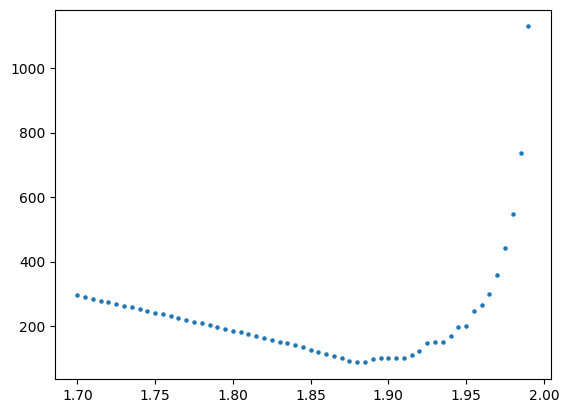

In [25]:
iteration = []
for omega in np.arange(1.7, 1.99, 0.005):
    u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
    iteration.append(iteration_sor)
    print(omega)

plt.scatter(np.linspace(1.7, 1.99, len(iteration)), iteration, s=5)
plt.show()

50
100
150
200
1.75
50
100
150
200
1.8
50
100
150
200
1.85
50
100
150
200
1.9000000000000001
50
100
150
200
1.9500000000000002


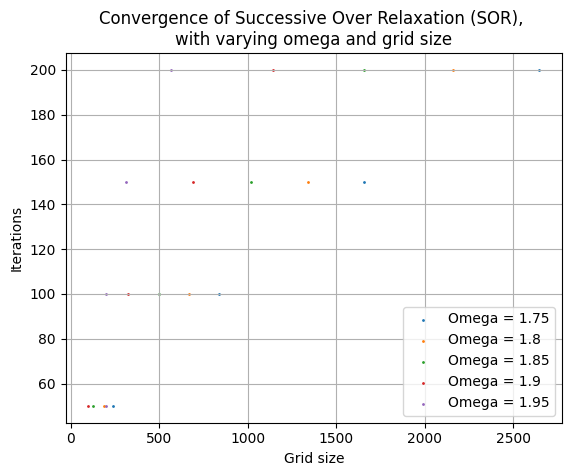

In [26]:
for omega in np.arange(1.75, 1.99, 0.05):
    iter = []
    grid_size_list = []
    for grid_size in np.arange(50, 201, 50):
        u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
        iter.append(iteration_sor)
        grid_size_list.append(grid_size)
        print(grid_size)
    print(omega)
    plt.scatter(iter, grid_size_list, s=5, label=f"Omega = {np.round(omega, 2)}")

plt.legend()
plt.grid(True)
plt.ylabel('Iterations')
plt.xlabel('Grid size')
plt.title('Convergence of Successive Over Relaxation (SOR), \nwith varying omega and grid size')
# plt.yscale('log')

plt.show()

C:\Users\sacha\AppData\Local\Temp\ipykernel_4100\329834084.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


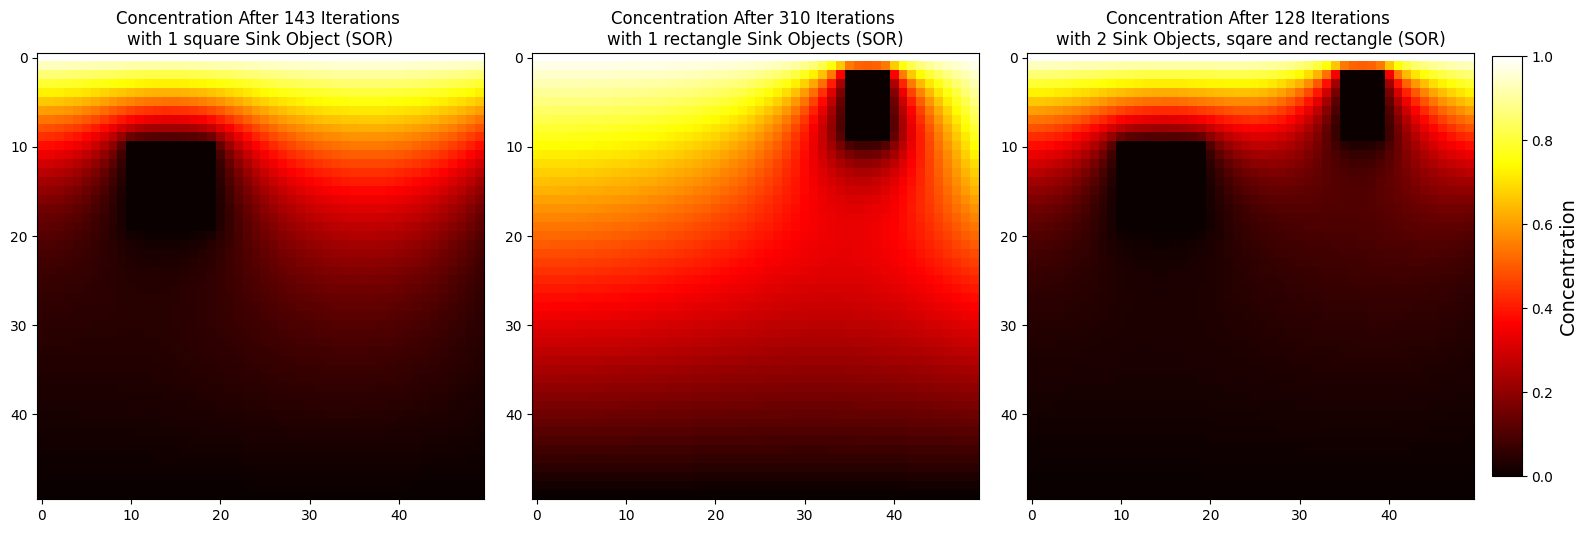

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_diffusion_sor_with_objects(grid_size, epsilon, omega, object_masks):
    # Initialize the concentration grid for Successive Over Relaxation (SOR)
    u_sor = np.zeros((grid_size, grid_size))
    u_sor[0, :] = 1  # Set top row concentration to 1

    theta = np.inf  # Initialize theta to be larger than epsilon
    iteration = 0  # Counter for iterations
    theta_list = []

    # Perform SOR until convergence, in place
    while theta > epsilon:
        max_change = 0
        for i in range(1, grid_size-1):
            for j in range(grid_size-1):
                if not any(mask[i, j] for mask in object_masks):
                    old_value = np.copy(u_sor[i, j])  # Store the old value of the current cell
                    # SOR update using the surrounding neighbors
                    u_sor[i, j] = (omega / 4) * (u_sor[i+1, j] + u_sor[i-1, j] + u_sor[i, j+1] + u_sor[i, j-1]) + (1 - omega) * old_value
                    # Calculate the maximum change for convergence check
                    max_change = max(max_change, np.abs(u_sor[i, j] - old_value))

        # Boundary condition
        u_sor[:, -1] = u_sor[:, 0]

        theta = max_change
        theta_list.append(theta)
        iteration += 1

    return u_sor, iteration, theta_list

# Parameters
grid_size = 50
epsilon = 1e-5
omega = 1.85

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# fig.title(f'Concentration diffusion with SOR iteration with Sink Objects', fontsize=16, loc='center')

# Create object masks
object_masks = [np.zeros((grid_size, grid_size)) for _ in range(1)]
object_masks[0][10:20, 10:20] = 1
# object_masks[1][2:10, 35:40] = 1

# Simulate diffusion with objects using SOR
u_sor_with_objects, iteration, _ = simulate_diffusion_sor_with_objects(grid_size, epsilon, omega, object_masks)

# Plot final concentration field
im = ax1.imshow(u_sor_with_objects, cmap='hot', interpolation='nearest')
ax1.set_title(f'Concentration After {iteration} Iterations \nwith 1 square Sink Object (SOR)')

# Create object masks
object_masks = [np.zeros((grid_size, grid_size)) for _ in range(2)]
object_masks[0][10:20, 10:20] = 1
object_masks[1][2:10, 35:40] = 1

# Simulate diffusion with objects using SOR
u_sor_with_objects, iteration, _ = simulate_diffusion_sor_with_objects(grid_size, epsilon, omega, object_masks)

# Plot final concentration field
ax3.imshow(u_sor_with_objects, cmap='hot', interpolation='nearest')
ax3.set_title(f'Concentration After {iteration} Iterations \nwith 2 Sink Objects, sqare and rectangle (SOR)')

# Create object masks
object_masks = [np.zeros((grid_size, grid_size)) for _ in range(1)]
object_masks[0][2:10, 35:40] = 1

# Simulate diffusion with objects using SOR
u_sor_with_objects, iteration, _ = simulate_diffusion_sor_with_objects(grid_size, epsilon, omega, object_masks)

# Plot final concentration field
ax2.imshow(u_sor_with_objects, cmap='hot', interpolation='nearest')
ax2.set_title(f'Concentration After {iteration} Iterations \nwith 1 rectangle Sink Objects (SOR)')

# Add colorbar
cbar_ax = fig.add_axes([1, 0.08, 0.02, 0.84])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Concentration', fontsize=14)

# Set title for the last subplot
# plt.title(f'Concentration After {iteration} Iterations \nwith Sink Object (SOR)', fontsize=16, loc='center')

plt.tight_layout()
plt.show()


1.7
1.7049999999999998
1.7099999999999997
1.7149999999999996
1.7199999999999995
1.7249999999999994
1.7299999999999993
1.7349999999999992
1.739999999999999
1.744999999999999
1.749999999999999
1.7549999999999988
1.7599999999999987
1.7649999999999986
1.7699999999999985
1.7749999999999984
1.7799999999999983
1.7849999999999981
1.789999999999998
1.794999999999998
1.7999999999999978
1.8049999999999977
1.8099999999999976
1.8149999999999975
1.8199999999999974
1.8249999999999973
1.8299999999999972
1.834999999999997
1.839999999999997
1.8449999999999969
1.8499999999999968
1.8549999999999967
1.8599999999999965
1.8649999999999964
1.8699999999999963
1.8749999999999962
1.8799999999999961
1.884999999999996
1.889999999999996
1.8949999999999958
1.8999999999999957
1.9049999999999956
1.9099999999999955
1.9149999999999954
1.9199999999999953
1.9249999999999952
1.929999999999995
1.934999999999995
1.9399999999999948
1.9449999999999947
1.9499999999999946
1.9549999999999945
1.9599999999999944
1.9649999999999943


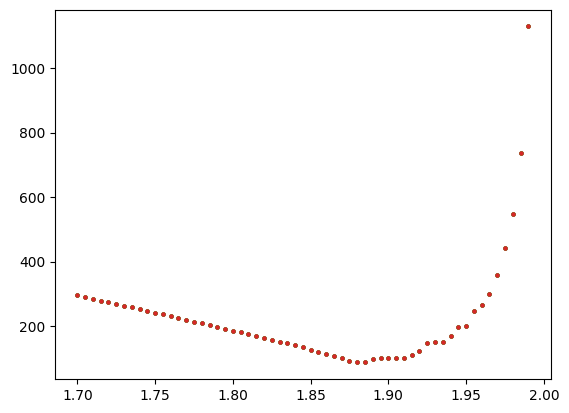

In [64]:
for i in range(4):
    if i == 1:
        object_masks = [np.zeros((grid_size, grid_size)) for _ in range(1)]
        object_masks[0][10:20, 10:20] = 1
    elif i ==2:
        object_masks = [np.zeros((grid_size, grid_size)) for _ in range(1)]
        object_masks[0][2:10, 35:40] = 1
    elif i ==3:
        object_masks = [np.zeros((grid_size, grid_size)) for _ in range(2)]
        object_masks[0][10:20, 10:20] = 1
        object_masks[1][2:10, 35:40] = 1
    
    iteration = []
    for omega in np.arange(1.7, 1.99, 0.005):
        u_sor, iteration_sor, theta_sor = simulate_diffusion_sor(grid_size, epsilon, omega)
        iteration.append(iteration_sor)
        print(omega)

    plt.scatter(np.linspace(1.7, 1.99, len(iteration)), iteration, s=5)
plt.show()